Final Results Table:
     Model  Accuracy  Precision  Recall  F1_Score  Topsis_Score  Rank
0  Model_A      0.85       0.80    0.84      0.82      0.519697     3
1  Model_B      0.88       0.83    0.86      0.85      1.000000     1
2  Model_C      0.82       0.78    0.79      0.78      0.000000     4
3  Model_D      0.86       0.81    0.85      0.83      0.682989     2


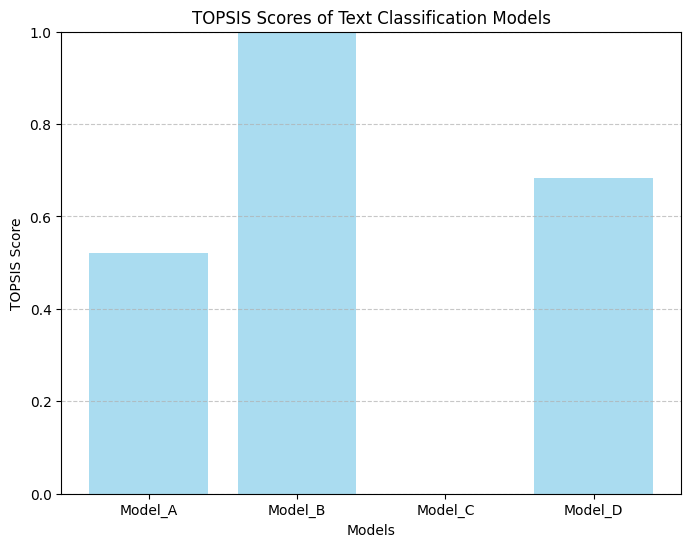

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data for text classification models with metrics
data = {
    'Model': ['Model_A', 'Model_B', 'Model_C', 'Model_D'],
    'Accuracy': [0.85, 0.88, 0.82, 0.86],
    'Precision': [0.80, 0.83, 0.78, 0.81],
    'Recall': [0.84, 0.86, 0.79, 0.85],
    'F1_Score': [0.82, 0.85, 0.78, 0.83]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# TOPSIS implementation
# Step 1: Normalize the decision matrix
def normalize_matrix(df, criteria):
    norm_df = df.copy()
    for col in criteria:
        norm_df[col] = df[col] / np.sqrt(np.sum(df[col]**2))
    return norm_df

# Step 2: Weight the normalized matrix
weights = [0.4, 0.3, 0.2, 0.1]  # Example weights for each criterion
criteria = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
def weighted_normalized_matrix(norm_df, weights):
    return norm_df * weights

# Step 3: Determine ideal and anti-ideal solutions
def calculate_ideal_solutions(norm_df):
    ideal = norm_df.max()
    anti_ideal = norm_df.min()
    return ideal, anti_ideal

# Step 4: Calculate distances to ideal and anti-ideal solutions
def calculate_distances(norm_df, ideal, anti_ideal):
    distances_to_ideal = np.sqrt(((norm_df - ideal)**2).sum(axis=1))
    distances_to_anti_ideal = np.sqrt(((norm_df - anti_ideal)**2).sum(axis=1))
    return distances_to_ideal, distances_to_anti_ideal

# Step 5: Calculate TOPSIS score and rank
norm_df = normalize_matrix(df[criteria], criteria)
weighted_norm_df = weighted_normalized_matrix(norm_df, weights)
ideal, anti_ideal = calculate_ideal_solutions(weighted_norm_df)
distances_to_ideal, distances_to_anti_ideal = calculate_distances(weighted_norm_df, ideal, anti_ideal)
df['Topsis_Score'] = distances_to_anti_ideal / (distances_to_ideal + distances_to_anti_ideal)
df['Rank'] = df['Topsis_Score'].rank(ascending=False).astype(int)

# Display the table
print("Final Results Table:")
print(df)

# Generate a bar chart
plt.figure(figsize=(8, 6))
plt.bar(df['Model'], df['Topsis_Score'], color='skyblue', alpha=0.7)
plt.title('TOPSIS Scores of Text Classification Models')
plt.xlabel('Models')
plt.ylabel('TOPSIS Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
